### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [656]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 22:32:10


In [657]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [658]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to make the file of wss, sil scores open immediately
import os

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [659]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [660]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [661]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [662]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 22:32:10


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [663]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [664]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [665]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [666]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [667]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [668]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have two ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the second method

## Doc2Vec
in this we have two methods:
- DBOW (Distributed Bag of Words) Model
- DM (Distributed Memory) Model

In [669]:
# for dm variable
dm = 0 # DBOW
# dm = 1 # DM

if dm == 0:
    model_type = 'DBOW'
else:
    model_type = 'DM'

print(f"dm={dm}, model={model_type}")

dm=0, model=DBOW


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [670]:
# vector_sizes = [50, 100, 150, 200, 250, 300]
# vector_sizes = [300, 325, 350, 400]
# vector_sizes = [400, 410, 425, 450, 500]
# vector_sizes = [500, 510, 525, 550, 600]
# vector_sizes = [600, 610, 625, 650, 700]
# vector_sizes = [700, 710, 725, 750, 800]
# vector_sizes = [800, 810, 825, 850, 900, 910, 925, 950, 1000]
# vector_sizes = [1000, 1100, 1200, 1300, 1400, 1500]
# vector_sizes = [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]
vector_sizes = [2500, 2750, 3000, 3250, 3500, 3750, 4000]
selected_vector_size = vector_sizes[0]

In [671]:
windows = [3, 5, 7, 10, 12, 15, 20]
# windows = [8, 9, 10, 11, 12]
selected_window = windows[0]

In [672]:
epochs = [50, 100, 150, 200, 250]
# epochs = [5, 10, 20, 30, 40, 50, 60]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [673]:
def run_doc2vec (docs, vector_size, window_size, epoch):
    
    # Ensure docs is a DataFrame
    if not isinstance(docs, pd.DataFrame):
        docs = pd.DataFrame(docs, columns=["text"])  # Convert list to DataFrame
    
    # Convert text data into TaggedDocument format
    tagged_data = [TaggedDocument(words=document.split(), tags=[str(i)]) for i, document in enumerate(documents)]
    
    # Initialize and train model
    doc2vec_model = Doc2Vec(
        tagged_data,
        vector_size=vector_size, 
        window=window_size, 
        min_count=1, 
        workers=4, 
        dm=dm, 
        epochs=epoch
    )
    
    # Compute document embeddings
    docs = np.array([doc2vec_model.dv[str(i)] for i in range(len(docs))])
    
    print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [674]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=20, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [675]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    # Ensure data is a proper NumPy array
    data = np.array(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Doc2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [676]:
copy_of_docs = documents

In [677]:
window = selected_window
epoch = selected_epoch
# vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [678]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [679]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [680]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [681]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for vector_size in vector_sizes:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_doc2vec(copy_of_docs, vector_size, window, epoch)
        print(f"dm={dm}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "doc", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.05 range
            sil_diff = best_Sil - sil
            wss_diff = best_WSS - wss
            if sil_diff >= 0 and sil_diff < 0.05 and wss_diff > 0:
                best_combination = [k, "doc", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

Executed at: 2025-03-09 22:32:16 

[[-7.3859829e-04 -4.3893629e-03 -1.1512776e-03 ... -1.0211601e-02
  -2.9994841e-03  6.0367645e-03]
 [-1.0057752e-03 -3.7369719e-03 -1.2284574e-04 ... -8.8602463e-03
  -3.2019585e-03  5.8702887e-03]
 [ 2.5520343e-04 -2.8804904e-03 -7.1846921e-04 ... -5.5805221e-03
  -1.5078300e-03  3.6238874e-03]
 ...
 [-5.3903618e-04 -3.2795779e-03 -1.2158597e-03 ... -9.7495019e-03
  -2.6817671e-03  6.3024480e-03]
 [ 1.6165960e-04 -3.6960316e-03 -2.2133860e-04 ... -9.1614099e-03
  -2.9039611e-03  5.6276862e-03]
 [-1.0066419e-04 -3.7937863e-03 -2.0496744e-05 ... -8.7777013e-03
  -2.5031753e-03  5.6098765e-03]]
dm=0, Vector_Size=2500, Window=3, Epoch=50
Finished at: 2025-03-09 22:32:25 

Executing 5 start time: 2025-03-09 22:32:25
K=5: Silhouette Score and WSS=0.2622	0.2141

Cluster 0:
- Saudi Arabia confirms alcohol ban at 2034 FIFA World Cup
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- Bots dupe the lonely looking for love and access f

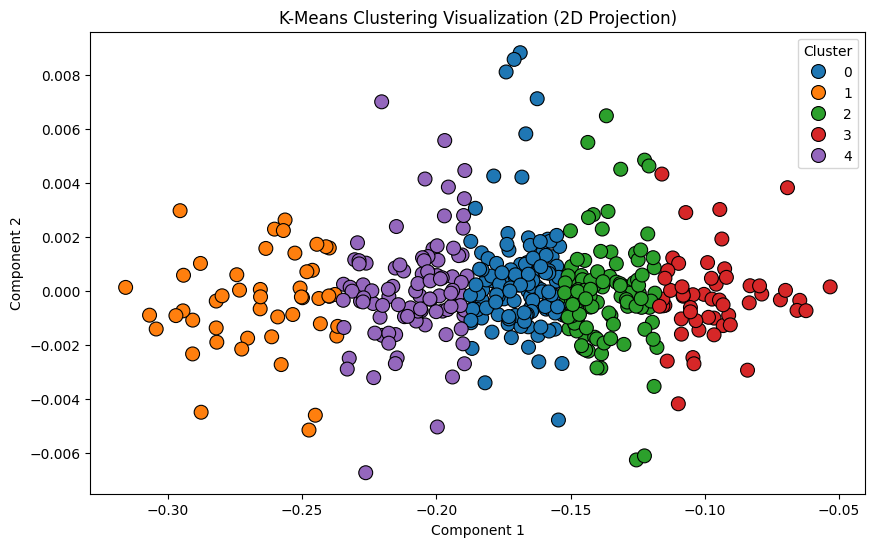

Finished displaying at: 2025-03-09 22:32:26 

Finished executing at: 2025-03-09 22:32:26 

Executed at: 2025-03-09 22:32:26 

[[-2.5464888e-03  9.6331627e-05 -9.0209963e-03 ... -6.3625467e-04
   3.9844546e-03 -1.1616716e-03]
 [-1.8003358e-03  2.1714559e-04 -8.0432128e-03 ...  3.3105345e-04
   3.5486838e-03 -1.0893259e-03]
 [-7.4491755e-04  7.9648185e-04 -5.1563047e-03 ...  1.5401388e-04
   2.5800590e-03 -6.7304430e-04]
 ...
 [-1.4846461e-03  9.1601070e-04 -8.3461590e-03 ... -5.5945013e-04
   4.4733468e-03 -1.5893760e-03]
 [-1.2754627e-03  6.6820117e-05 -6.9410335e-03 ... -4.6813439e-04
   3.3671153e-03 -1.3517621e-03]
 [-1.5225488e-03  2.8524996e-04 -7.5156833e-03 ...  3.1158040e-04
   4.0554111e-03 -1.0822510e-03]]
dm=0, Vector_Size=2750, Window=3, Epoch=50
Finished at: 2025-03-09 22:32:37 

Executing 5 start time: 2025-03-09 22:32:37
K=5: Silhouette Score and WSS=0.2744	0.2027

Cluster 0:
- Imran’s attempts to engage military draw cold shoulder
- Umair Jaswal, Hadiqa Kiani, and Shae 

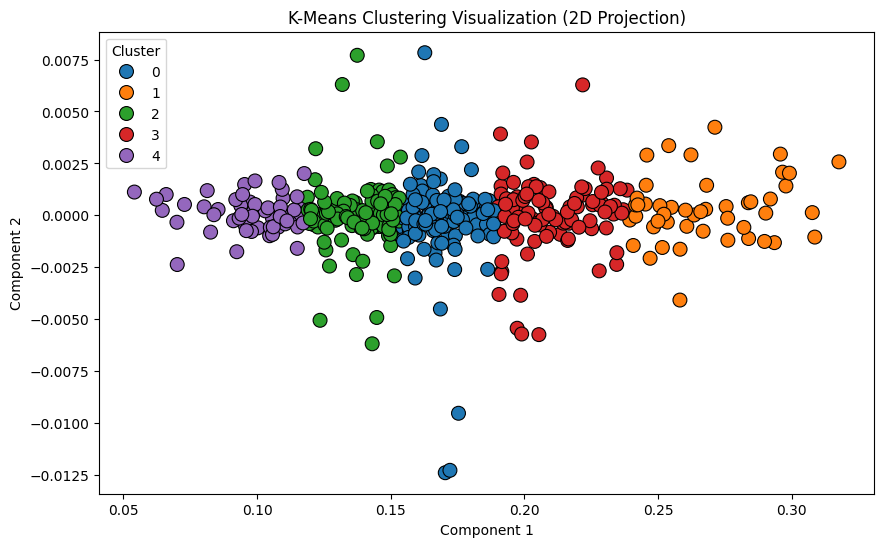

Finished displaying at: 2025-03-09 22:32:38 

Finished executing at: 2025-03-09 22:32:38 

Executed at: 2025-03-09 22:32:38 

[[-0.00584745  0.00023662 -0.00125763 ... -0.00447954  0.0023341
   0.00430126]
 [-0.00543043  0.00070942 -0.00062419 ... -0.003328    0.00282266
   0.00408683]
 [-0.00258816  0.00038434 -0.00067996 ... -0.00174704  0.00127238
   0.00268308]
 ...
 [-0.00572417  0.00042777 -0.00100479 ... -0.00358365  0.00243404
   0.00388288]
 [-0.00464903  0.00069463 -0.00087482 ... -0.00330597  0.00199228
   0.00369956]
 [-0.00443927  0.00087058 -0.00080419 ... -0.00321745  0.00256769
   0.00368064]]
dm=0, Vector_Size=3000, Window=3, Epoch=50
Finished at: 2025-03-09 22:32:50 

Executing 5 start time: 2025-03-09 22:32:50
K=5: Silhouette Score and WSS=0.2710	0.1839

Cluster 0:
- SALU, Spanish university sign MoU to boost archaeological studies
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Commissioner chairs meeting to review monthly performa

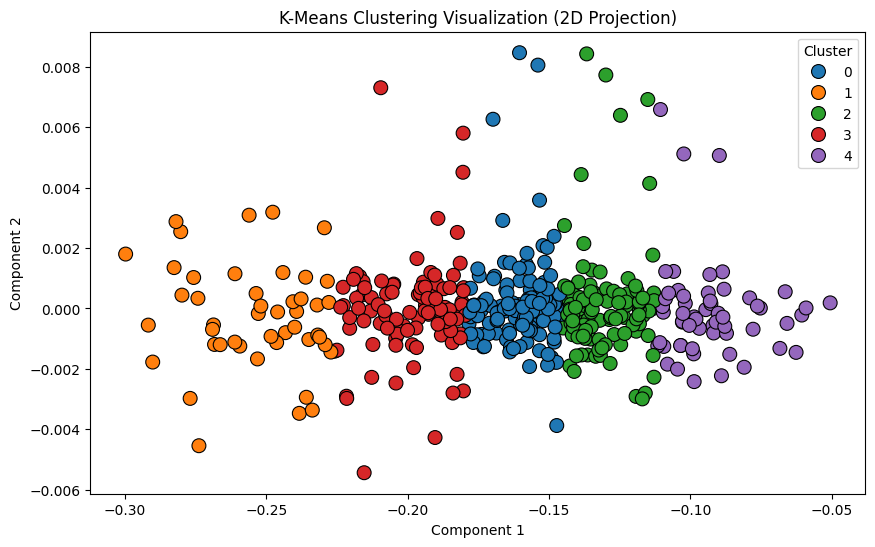

Finished displaying at: 2025-03-09 22:32:52 

Finished executing at: 2025-03-09 22:32:52 

Executed at: 2025-03-09 22:32:52 

[[-6.4822952e-03 -1.2784302e-03 -1.6285793e-03 ...  2.7005391e-03
  -2.6829360e-04 -3.9752587e-03]
 [-5.7159332e-03 -6.2272692e-04 -5.0983275e-04 ...  2.9722685e-03
   2.2852590e-04 -3.5837013e-03]
 [-2.9711449e-03 -1.8722237e-04 -7.4306689e-04 ...  1.3424261e-03
  -5.5860310e-05 -2.3396849e-03]
 ...
 [-5.8330065e-03 -9.2791952e-04 -8.4912695e-04 ...  2.1974079e-03
  -2.5599715e-04 -3.8115499e-03]
 [-5.6661833e-03 -1.1934211e-03 -1.4812986e-03 ...  1.8668580e-03
  -3.4048059e-04 -3.6171386e-03]
 [-5.7630930e-03 -6.0377212e-04 -1.3992973e-03 ...  2.1689674e-03
  -2.4813382e-04 -3.4178901e-03]]
dm=0, Vector_Size=3250, Window=3, Epoch=50
Finished at: 2025-03-09 22:33:09 

Executing 5 start time: 2025-03-09 22:33:09
K=5: Silhouette Score and WSS=0.2647	0.1663

Cluster 0:
- Imran’s attempts to engage military draw cold shoulder
- Umair Jaswal, Hadiqa Kiani, and Shae 

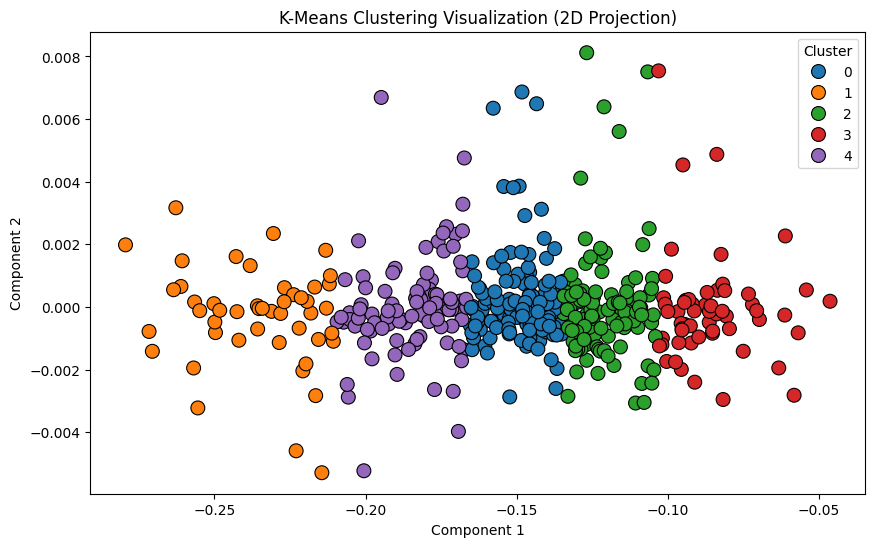

Finished displaying at: 2025-03-09 22:33:12 

Finished executing at: 2025-03-09 22:33:12 

Executed at: 2025-03-09 22:33:12 

[[-2.2245922e-05  9.1234379e-04 -5.9317000e-04 ... -5.1668650e-03
  -4.3692151e-03 -2.7820275e-03]
 [ 5.3085765e-04  7.5147959e-04  6.1443796e-05 ... -4.2557744e-03
  -4.2485557e-03 -2.3057847e-03]
 [-1.4381224e-04  9.5053279e-04  7.3687829e-06 ... -2.8032998e-03
  -2.9716454e-03 -1.4421102e-03]
 ...
 [ 2.8391759e-04  1.4633044e-03  3.0142374e-04 ... -4.8745289e-03
  -4.2553050e-03 -2.3641086e-03]
 [-1.9376510e-04  8.8461884e-04 -5.2692910e-04 ... -4.2246045e-03
  -3.7021437e-03 -2.2778527e-03]
 [ 4.4194501e-04  1.2438485e-03  3.7136819e-05 ... -4.0851976e-03
  -3.9865463e-03 -1.5763486e-03]]
dm=0, Vector_Size=3500, Window=3, Epoch=50
Finished at: 2025-03-09 22:33:24 

Executing 5 start time: 2025-03-09 22:33:24
K=5: Silhouette Score and WSS=0.2686	0.1568

Cluster 0:
- Hamas vows to uphold truce, plans to proceed with hostage-prisoner swap
- FBR confident of rai

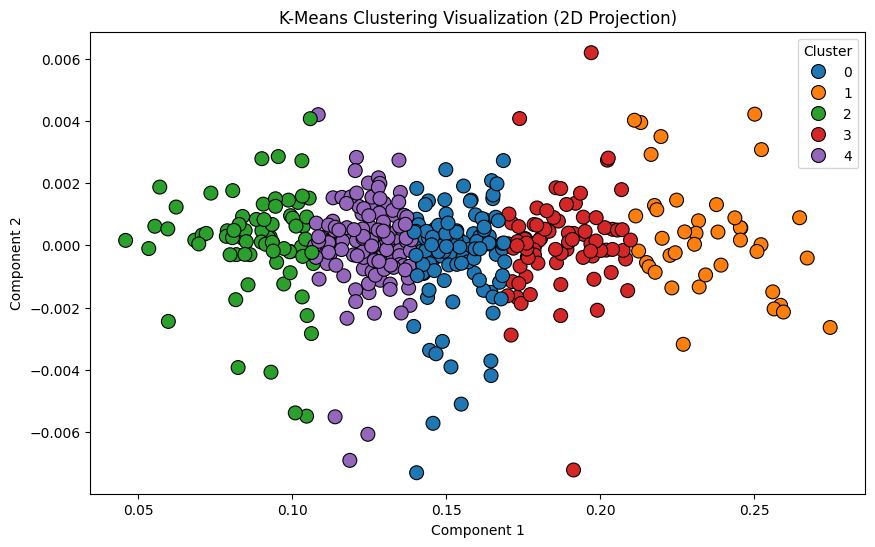

Finished displaying at: 2025-03-09 22:33:25 

Finished executing at: 2025-03-09 22:33:25 

Executed at: 2025-03-09 22:33:25 

[[-8.0364983e-04 -7.0915680e-04 -5.5394080e-03 ... -3.9244783e-03
  -1.7836630e-04  6.8312080e-04]
 [-2.2810583e-04 -6.5836048e-04 -4.7897724e-03 ... -3.4811832e-03
   3.8416308e-04  7.1741635e-04]
 [-6.2071584e-04 -3.2984812e-04 -3.0477871e-03 ... -1.5856758e-03
   4.0257344e-04  2.5396061e-04]
 ...
 [-2.1647813e-04 -1.2980543e-04 -4.6730656e-03 ... -3.8200852e-03
  -3.5315310e-04  6.8081712e-04]
 [-5.8614422e-04 -7.2017504e-04 -4.0640957e-03 ... -3.2378561e-03
  -4.7701705e-04  4.2655683e-04]
 [-6.7969675e-05 -5.1837420e-04 -4.6502897e-03 ... -3.3115032e-03
  -2.9090018e-04  8.0219621e-04]]
dm=0, Vector_Size=3750, Window=3, Epoch=50
Finished at: 2025-03-09 22:33:34 

Executing 5 start time: 2025-03-09 22:33:34
K=5: Silhouette Score and WSS=0.2715	0.1477

Cluster 0:
- Imran’s attempts to engage military draw cold shoulder
- Umair Jaswal, Hadiqa Kiani, and Shae 

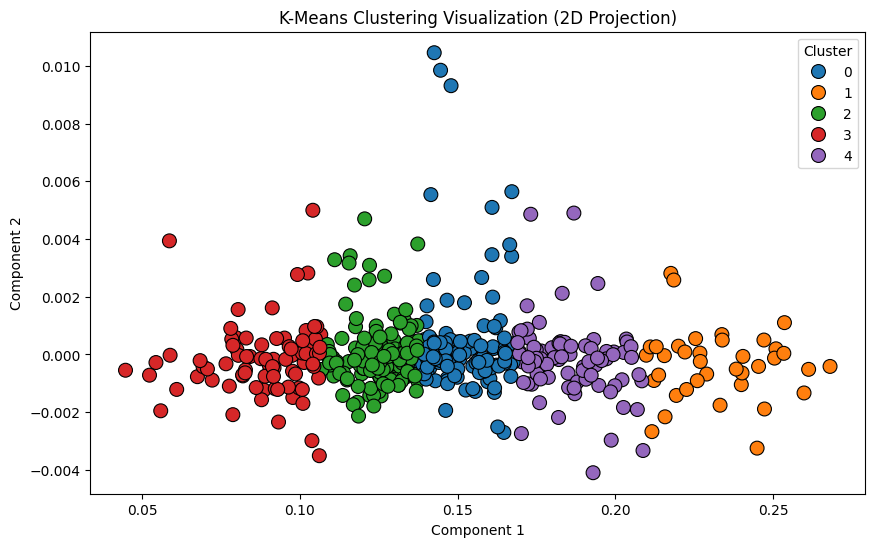

Finished displaying at: 2025-03-09 22:33:36 

Finished executing at: 2025-03-09 22:33:36 

Executed at: 2025-03-09 22:33:36 

[[ 0.00194447 -0.00301037 -0.00351551 ... -0.00500878 -0.00475686
  -0.00077781]
 [ 0.00166784 -0.00286441 -0.00296262 ... -0.00462067 -0.00404048
  -0.00082069]
 [ 0.00144286 -0.00152641 -0.00168494 ... -0.00226245 -0.00263163
  -0.00027052]
 ...
 [ 0.0021366  -0.00255813 -0.00299782 ... -0.00464118 -0.00467152
  -0.00057628]
 [ 0.00207292 -0.0022893  -0.00302576 ... -0.00382669 -0.00415671
  -0.00048823]
 [ 0.00210473 -0.00262621 -0.00261909 ... -0.00405609 -0.00417932
  -0.00101111]]
dm=0, Vector_Size=4000, Window=3, Epoch=50
Finished at: 2025-03-09 22:33:45 

Executing 5 start time: 2025-03-09 22:33:45
K=5: Silhouette Score and WSS=0.2695	0.1398

Cluster 0:
- LHC takes stand against illegal dog culling
- Local bodies members flexing muscles for another protest in Peshawar
- PSW CEO meets delegation led by Galaxefi CEO
- Holding peaceful meetings democratic r

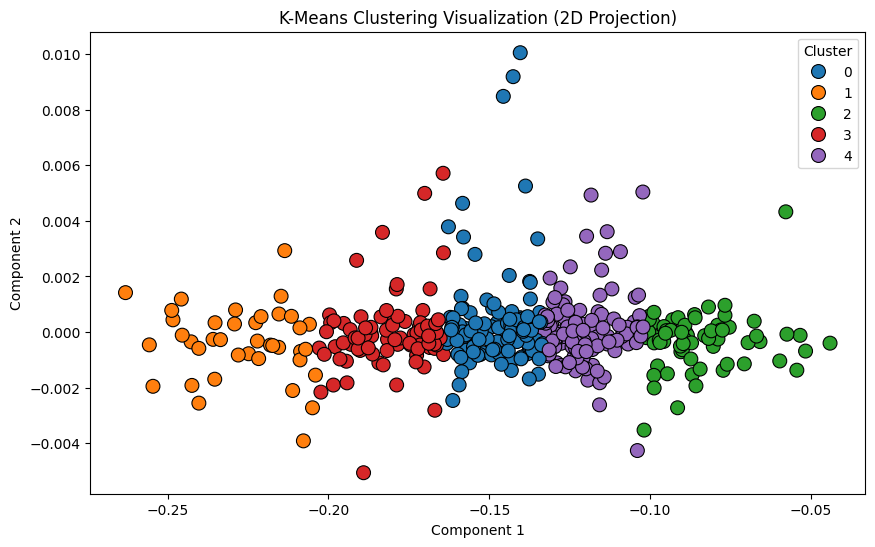

Finished displaying at: 2025-03-09 22:33:46 

Finished executing at: 2025-03-09 22:33:46 



In [682]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

Executed at: 2025-03-09 22:33:46 

[[-7.3859829e-04 -4.3893629e-03 -1.1512776e-03 ... -1.0211601e-02
  -2.9994841e-03  6.0367645e-03]
 [-1.0057752e-03 -3.7369719e-03 -1.2284574e-04 ... -8.8602463e-03
  -3.2019585e-03  5.8702887e-03]
 [ 2.5520343e-04 -2.8804904e-03 -7.1846921e-04 ... -5.5805221e-03
  -1.5078300e-03  3.6238874e-03]
 ...
 [-5.3903618e-04 -3.2795779e-03 -1.2158597e-03 ... -9.7495019e-03
  -2.6817671e-03  6.3024480e-03]
 [ 1.6165960e-04 -3.6960316e-03 -2.2133860e-04 ... -9.1614099e-03
  -2.9039611e-03  5.6276862e-03]
 [-1.0066419e-04 -3.7937863e-03 -2.0496744e-05 ... -8.7777013e-03
  -2.5031753e-03  5.6098765e-03]]
dm=0, Vector_Size=2500, Window=3, Epoch=50
Finished at: 2025-03-09 22:33:52 

Executing 9 start time: 2025-03-09 22:33:52
K=9: Silhouette Score and WSS=0.1628	0.1634

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Justice Sarfraz Dogar takes oath as

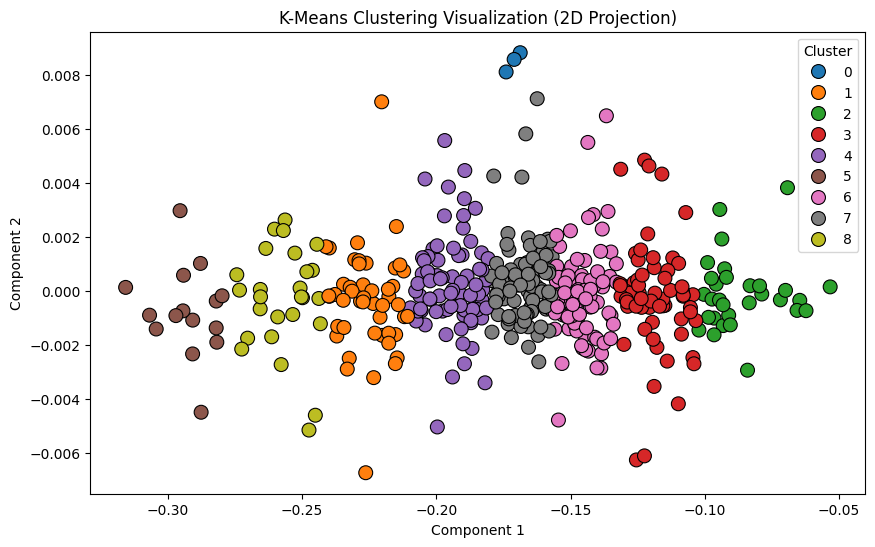

Finished displaying at: 2025-03-09 22:33:54 

Finished executing at: 2025-03-09 22:33:54 

Executed at: 2025-03-09 22:33:54 

[[-2.5464888e-03  9.6331627e-05 -9.0209963e-03 ... -6.3625467e-04
   3.9844546e-03 -1.1616716e-03]
 [-1.8003358e-03  2.1714559e-04 -8.0432128e-03 ...  3.3105345e-04
   3.5486838e-03 -1.0893259e-03]
 [-7.4491755e-04  7.9648185e-04 -5.1563047e-03 ...  1.5401388e-04
   2.5800590e-03 -6.7304430e-04]
 ...
 [-1.4846461e-03  9.1601070e-04 -8.3461590e-03 ... -5.5945013e-04
   4.4733468e-03 -1.5893760e-03]
 [-1.2754627e-03  6.6820117e-05 -6.9410335e-03 ... -4.6813439e-04
   3.3671153e-03 -1.3517621e-03]
 [-1.5225488e-03  2.8524996e-04 -7.5156833e-03 ...  3.1158040e-04
   4.0554111e-03 -1.0822510e-03]]
dm=0, Vector_Size=2750, Window=3, Epoch=50
Finished at: 2025-03-09 22:34:02 

Executing 9 start time: 2025-03-09 22:34:02
K=9: Silhouette Score and WSS=0.1697	0.1525

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointm

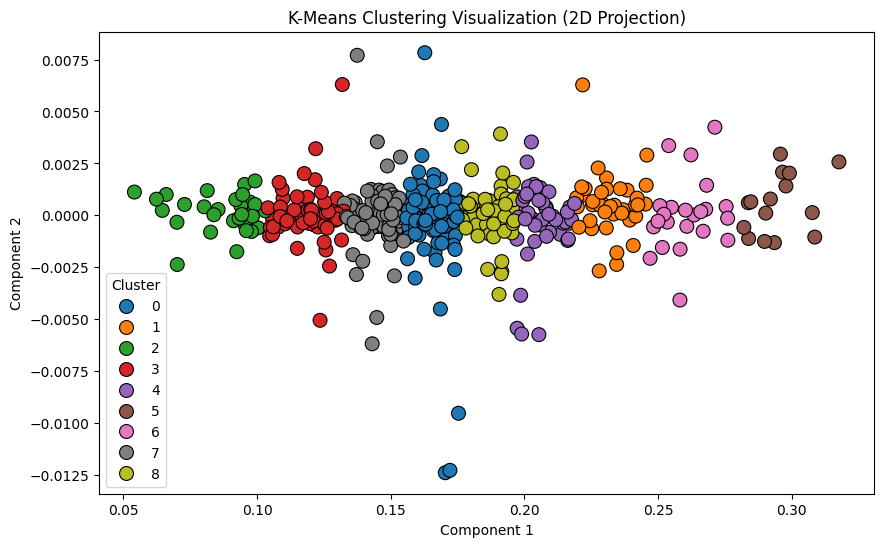

Finished displaying at: 2025-03-09 22:34:05 

Finished executing at: 2025-03-09 22:34:05 

Executed at: 2025-03-09 22:34:05 

[[-0.00584745  0.00023662 -0.00125763 ... -0.00447954  0.0023341
   0.00430126]
 [-0.00543043  0.00070942 -0.00062419 ... -0.003328    0.00282266
   0.00408683]
 [-0.00258816  0.00038434 -0.00067996 ... -0.00174704  0.00127238
   0.00268308]
 ...
 [-0.00572417  0.00042777 -0.00100479 ... -0.00358365  0.00243404
   0.00388288]
 [-0.00464903  0.00069463 -0.00087482 ... -0.00330597  0.00199228
   0.00369956]
 [-0.00443927  0.00087058 -0.00080419 ... -0.00321745  0.00256769
   0.00368064]]
dm=0, Vector_Size=3000, Window=3, Epoch=50
Finished at: 2025-03-09 22:34:14 

Executing 9 start time: 2025-03-09 22:34:14
K=9: Silhouette Score and WSS=0.1680	0.1383

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Justice Sarfraz Dogar takes oath as acting Chief Just

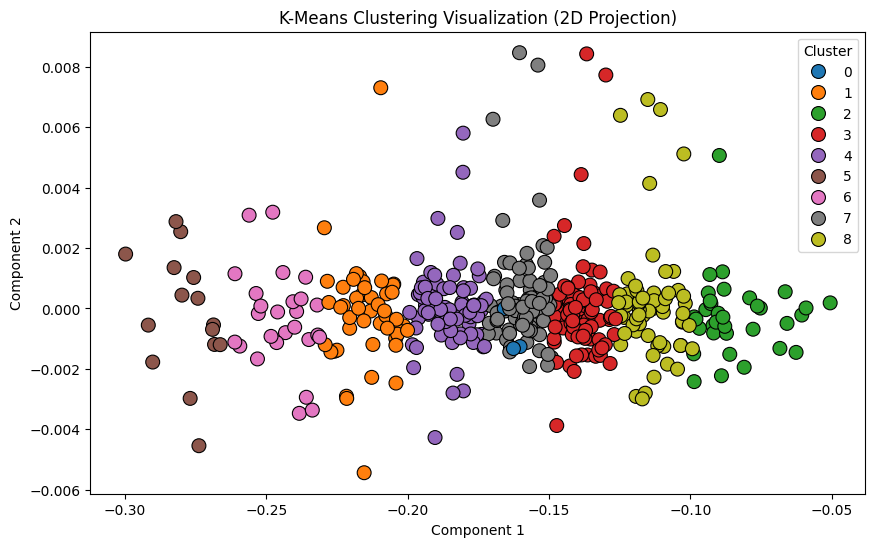

Finished displaying at: 2025-03-09 22:34:17 

Finished executing at: 2025-03-09 22:34:17 

Executed at: 2025-03-09 22:34:17 

[[-6.4822952e-03 -1.2784302e-03 -1.6285793e-03 ...  2.7005391e-03
  -2.6829360e-04 -3.9752587e-03]
 [-5.7159332e-03 -6.2272692e-04 -5.0983275e-04 ...  2.9722685e-03
   2.2852590e-04 -3.5837013e-03]
 [-2.9711449e-03 -1.8722237e-04 -7.4306689e-04 ...  1.3424261e-03
  -5.5860310e-05 -2.3396849e-03]
 ...
 [-5.8330065e-03 -9.2791952e-04 -8.4912695e-04 ...  2.1974079e-03
  -2.5599715e-04 -3.8115499e-03]
 [-5.6661833e-03 -1.1934211e-03 -1.4812986e-03 ...  1.8668580e-03
  -3.4048059e-04 -3.6171386e-03]
 [-5.7630930e-03 -6.0377212e-04 -1.3992973e-03 ...  2.1689674e-03
  -2.4813382e-04 -3.4178901e-03]]
dm=0, Vector_Size=3250, Window=3, Epoch=50
Finished at: 2025-03-09 22:34:30 

Executing 9 start time: 2025-03-09 22:34:30
K=9: Silhouette Score and WSS=0.1617	0.1225

Cluster 0:
- Pakistan set 243-run target for New Zealand in Tri-Nation series final
- New power projects: G

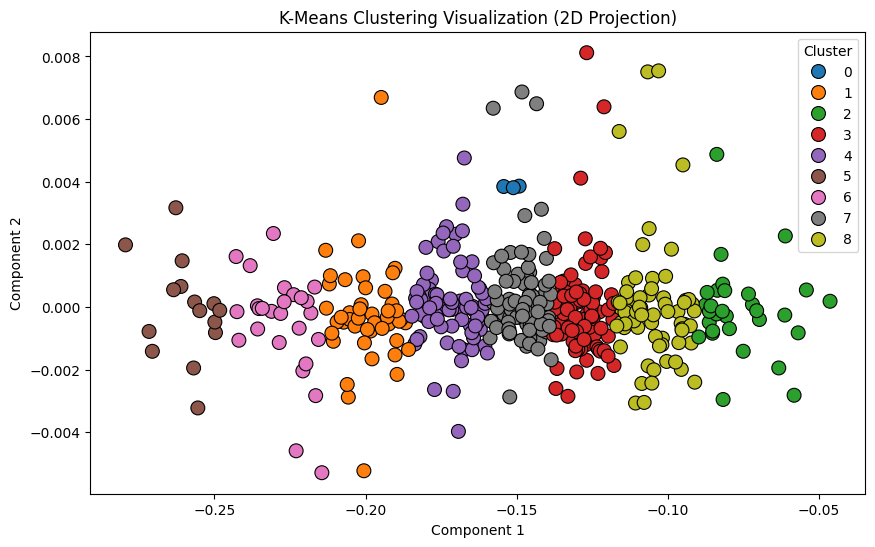

Finished displaying at: 2025-03-09 22:34:33 

Finished executing at: 2025-03-09 22:34:33 

Executed at: 2025-03-09 22:34:33 

[[-2.2245922e-05  9.1234379e-04 -5.9317000e-04 ... -5.1668650e-03
  -4.3692151e-03 -2.7820275e-03]
 [ 5.3085765e-04  7.5147959e-04  6.1443796e-05 ... -4.2557744e-03
  -4.2485557e-03 -2.3057847e-03]
 [-1.4381224e-04  9.5053279e-04  7.3687829e-06 ... -2.8032998e-03
  -2.9716454e-03 -1.4421102e-03]
 ...
 [ 2.8391759e-04  1.4633044e-03  3.0142374e-04 ... -4.8745289e-03
  -4.2553050e-03 -2.3641086e-03]
 [-1.9376510e-04  8.8461884e-04 -5.2692910e-04 ... -4.2246045e-03
  -3.7021437e-03 -2.2778527e-03]
 [ 4.4194501e-04  1.2438485e-03  3.7136819e-05 ... -4.0851976e-03
  -3.9865463e-03 -1.5763486e-03]]
dm=0, Vector_Size=3500, Window=3, Epoch=50
Finished at: 2025-03-09 22:34:43 

Executing 9 start time: 2025-03-09 22:34:43
K=9: Silhouette Score and WSS=0.1715	0.1177

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointm

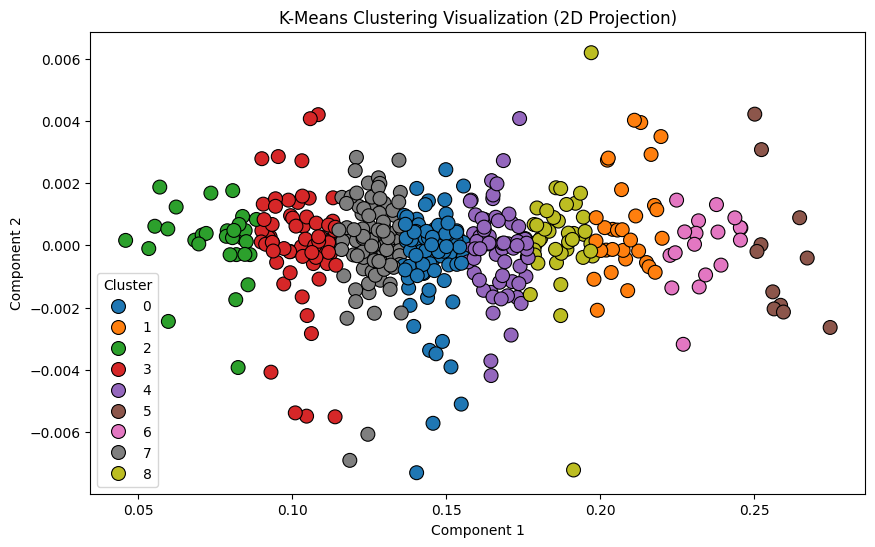

Finished displaying at: 2025-03-09 22:34:45 

Finished executing at: 2025-03-09 22:34:45 

Executed at: 2025-03-09 22:34:45 

[[-8.0364983e-04 -7.0915680e-04 -5.5394080e-03 ... -3.9244783e-03
  -1.7836630e-04  6.8312080e-04]
 [-2.2810583e-04 -6.5836048e-04 -4.7897724e-03 ... -3.4811832e-03
   3.8416308e-04  7.1741635e-04]
 [-6.2071584e-04 -3.2984812e-04 -3.0477871e-03 ... -1.5856758e-03
   4.0257344e-04  2.5396061e-04]
 ...
 [-2.1647813e-04 -1.2980543e-04 -4.6730656e-03 ... -3.8200852e-03
  -3.5315310e-04  6.8081712e-04]
 [-5.8614422e-04 -7.2017504e-04 -4.0640957e-03 ... -3.2378561e-03
  -4.7701705e-04  4.2655683e-04]
 [-6.7969675e-05 -5.1837420e-04 -4.6502897e-03 ... -3.3115032e-03
  -2.9090018e-04  8.0219621e-04]]
dm=0, Vector_Size=3750, Window=3, Epoch=50
Finished at: 2025-03-09 22:34:57 

Executing 9 start time: 2025-03-09 22:34:57
K=9: Silhouette Score and WSS=0.1899	0.1100

Cluster 0:
- Social media influence makes wedding events expensive
- CJP Afridi administers oath to newly-a

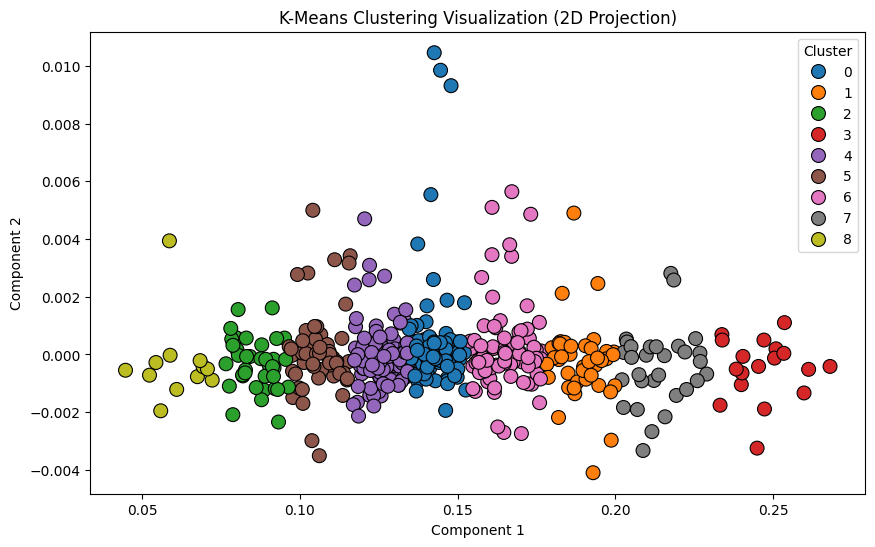

Finished displaying at: 2025-03-09 22:34:58 

Finished executing at: 2025-03-09 22:34:58 

Executed at: 2025-03-09 22:34:58 

[[ 0.00194447 -0.00301037 -0.00351551 ... -0.00500878 -0.00475686
  -0.00077781]
 [ 0.00166784 -0.00286441 -0.00296262 ... -0.00462067 -0.00404048
  -0.00082069]
 [ 0.00144286 -0.00152641 -0.00168494 ... -0.00226245 -0.00263163
  -0.00027052]
 ...
 [ 0.0021366  -0.00255813 -0.00299782 ... -0.00464118 -0.00467152
  -0.00057628]
 [ 0.00207292 -0.0022893  -0.00302576 ... -0.00382669 -0.00415671
  -0.00048823]
 [ 0.00210473 -0.00262621 -0.00261909 ... -0.00405609 -0.00417932
  -0.00101111]]
dm=0, Vector_Size=4000, Window=3, Epoch=50
Finished at: 2025-03-09 22:35:13 

Executing 9 start time: 2025-03-09 22:35:13
K=9: Silhouette Score and WSS=0.1540	0.1020

Cluster 0:
- Senate pays rich tributes to Prince Karim Aga Khan
- Hubco expands into EV charging sector with new subsidiary, partners with PSO
- Shaza engaging Huawei to advance Pak cloud infrastructure
- SALU, Span

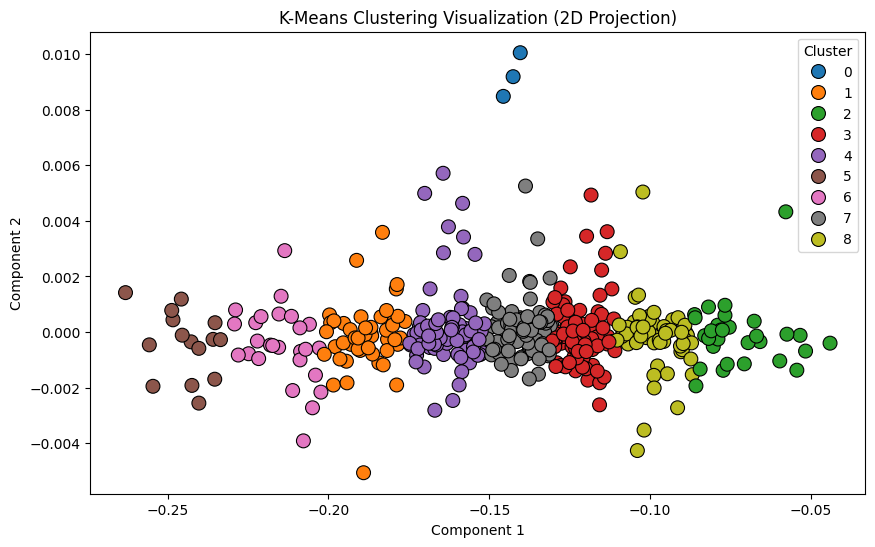

Finished displaying at: 2025-03-09 22:35:14 

Finished executing at: 2025-03-09 22:35:14 



In [683]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

Executed at: 2025-03-09 22:35:14 

[[-7.3859829e-04 -4.3893629e-03 -1.1512776e-03 ... -1.0211601e-02
  -2.9994841e-03  6.0367645e-03]
 [-1.0057752e-03 -3.7369719e-03 -1.2284574e-04 ... -8.8602463e-03
  -3.2019585e-03  5.8702887e-03]
 [ 2.5520343e-04 -2.8804904e-03 -7.1846921e-04 ... -5.5805221e-03
  -1.5078300e-03  3.6238874e-03]
 ...
 [-5.3903618e-04 -3.2795779e-03 -1.2158597e-03 ... -9.7495019e-03
  -2.6817671e-03  6.3024480e-03]
 [ 1.6165960e-04 -3.6960316e-03 -2.2133860e-04 ... -9.1614099e-03
  -2.9039611e-03  5.6276862e-03]
 [-1.0066419e-04 -3.7937863e-03 -2.0496744e-05 ... -8.7777013e-03
  -2.5031753e-03  5.6098765e-03]]
dm=0, Vector_Size=2500, Window=3, Epoch=50
Finished at: 2025-03-09 22:35:24 

Executing 13 start time: 2025-03-09 22:35:24
K=13: Silhouette Score and WSS=0.1095	0.1497

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Justice Sarfraz Dogar takes oath 

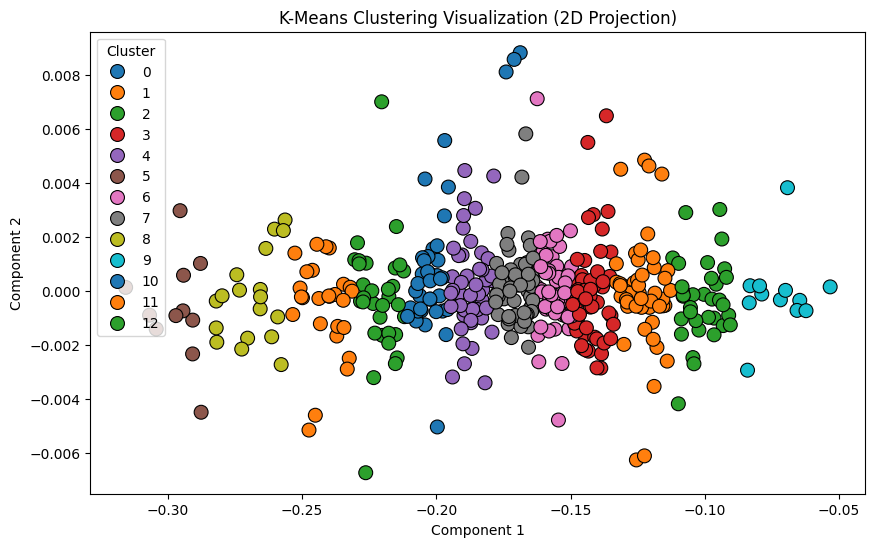

Finished displaying at: 2025-03-09 22:35:25 

Finished executing at: 2025-03-09 22:35:25 

Executed at: 2025-03-09 22:35:25 

[[-2.5464888e-03  9.6331627e-05 -9.0209963e-03 ... -6.3625467e-04
   3.9844546e-03 -1.1616716e-03]
 [-1.8003358e-03  2.1714559e-04 -8.0432128e-03 ...  3.3105345e-04
   3.5486838e-03 -1.0893259e-03]
 [-7.4491755e-04  7.9648185e-04 -5.1563047e-03 ...  1.5401388e-04
   2.5800590e-03 -6.7304430e-04]
 ...
 [-1.4846461e-03  9.1601070e-04 -8.3461590e-03 ... -5.5945013e-04
   4.4733468e-03 -1.5893760e-03]
 [-1.2754627e-03  6.6820117e-05 -6.9410335e-03 ... -4.6813439e-04
   3.3671153e-03 -1.3517621e-03]
 [-1.5225488e-03  2.8524996e-04 -7.5156833e-03 ...  3.1158040e-04
   4.0554111e-03 -1.0822510e-03]]
dm=0, Vector_Size=2750, Window=3, Epoch=50
Finished at: 2025-03-09 22:35:34 

Executing 13 start time: 2025-03-09 22:35:34
K=13: Silhouette Score and WSS=0.1148	0.1352

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appoin

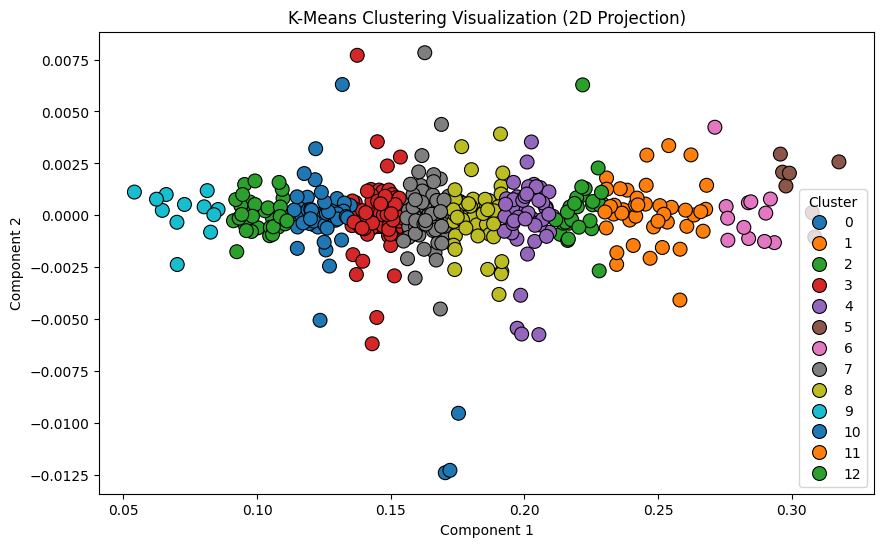

Finished displaying at: 2025-03-09 22:35:36 

Finished executing at: 2025-03-09 22:35:36 

Executed at: 2025-03-09 22:35:36 

[[-0.00584745  0.00023662 -0.00125763 ... -0.00447954  0.0023341
   0.00430126]
 [-0.00543043  0.00070942 -0.00062419 ... -0.003328    0.00282266
   0.00408683]
 [-0.00258816  0.00038434 -0.00067996 ... -0.00174704  0.00127238
   0.00268308]
 ...
 [-0.00572417  0.00042777 -0.00100479 ... -0.00358365  0.00243404
   0.00388288]
 [-0.00464903  0.00069463 -0.00087482 ... -0.00330597  0.00199228
   0.00369956]
 [-0.00443927  0.00087058 -0.00080419 ... -0.00321745  0.00256769
   0.00368064]]
dm=0, Vector_Size=3000, Window=3, Epoch=50
Finished at: 2025-03-09 22:35:48 

Executing 13 start time: 2025-03-09 22:35:48
K=13: Silhouette Score and WSS=0.1233	0.1244

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Justice Sarfraz Dogar takes oath as acting Chief Ju

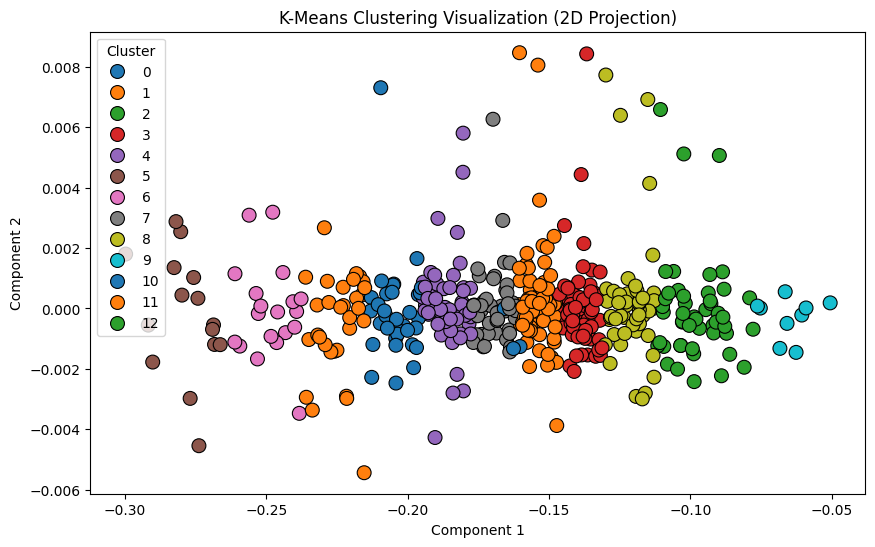

Finished displaying at: 2025-03-09 22:35:49 

Finished executing at: 2025-03-09 22:35:49 

Executed at: 2025-03-09 22:35:49 

[[-6.4822952e-03 -1.2784302e-03 -1.6285793e-03 ...  2.7005391e-03
  -2.6829360e-04 -3.9752587e-03]
 [-5.7159332e-03 -6.2272692e-04 -5.0983275e-04 ...  2.9722685e-03
   2.2852590e-04 -3.5837013e-03]
 [-2.9711449e-03 -1.8722237e-04 -7.4306689e-04 ...  1.3424261e-03
  -5.5860310e-05 -2.3396849e-03]
 ...
 [-5.8330065e-03 -9.2791952e-04 -8.4912695e-04 ...  2.1974079e-03
  -2.5599715e-04 -3.8115499e-03]
 [-5.6661833e-03 -1.1934211e-03 -1.4812986e-03 ...  1.8668580e-03
  -3.4048059e-04 -3.6171386e-03]
 [-5.7630930e-03 -6.0377212e-04 -1.3992973e-03 ...  2.1689674e-03
  -2.4813382e-04 -3.4178901e-03]]
dm=0, Vector_Size=3250, Window=3, Epoch=50
Finished at: 2025-03-09 22:36:04 

Executing 13 start time: 2025-03-09 22:36:04
K=13: Silhouette Score and WSS=0.1199	0.1121

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appoin

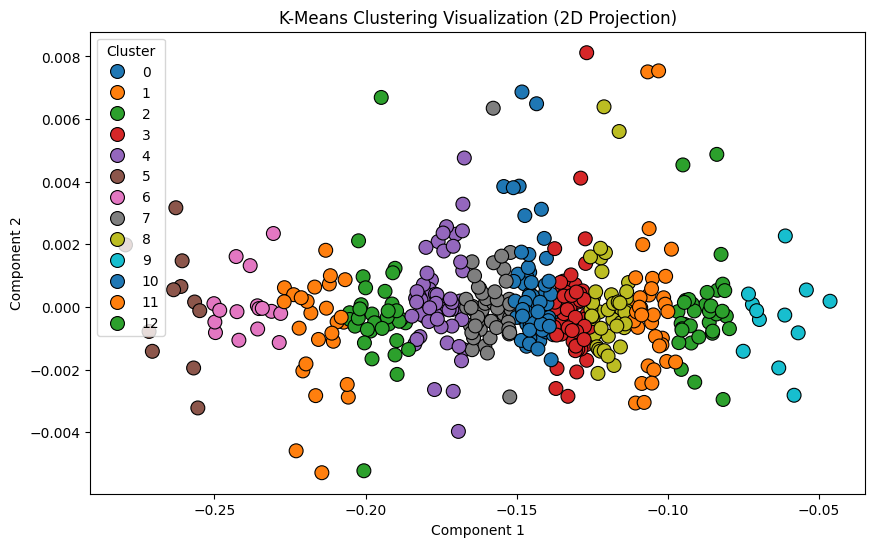

Finished displaying at: 2025-03-09 22:36:07 

Finished executing at: 2025-03-09 22:36:07 

Executed at: 2025-03-09 22:36:07 

[[-2.2245922e-05  9.1234379e-04 -5.9317000e-04 ... -5.1668650e-03
  -4.3692151e-03 -2.7820275e-03]
 [ 5.3085765e-04  7.5147959e-04  6.1443796e-05 ... -4.2557744e-03
  -4.2485557e-03 -2.3057847e-03]
 [-1.4381224e-04  9.5053279e-04  7.3687829e-06 ... -2.8032998e-03
  -2.9716454e-03 -1.4421102e-03]
 ...
 [ 2.8391759e-04  1.4633044e-03  3.0142374e-04 ... -4.8745289e-03
  -4.2553050e-03 -2.3641086e-03]
 [-1.9376510e-04  8.8461884e-04 -5.2692910e-04 ... -4.2246045e-03
  -3.7021437e-03 -2.2778527e-03]
 [ 4.4194501e-04  1.2438485e-03  3.7136819e-05 ... -4.0851976e-03
  -3.9865463e-03 -1.5763486e-03]]
dm=0, Vector_Size=3500, Window=3, Epoch=50
Finished at: 2025-03-09 22:36:19 

Executing 13 start time: 2025-03-09 22:36:19
K=13: Silhouette Score and WSS=0.1266	0.1052

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appoin

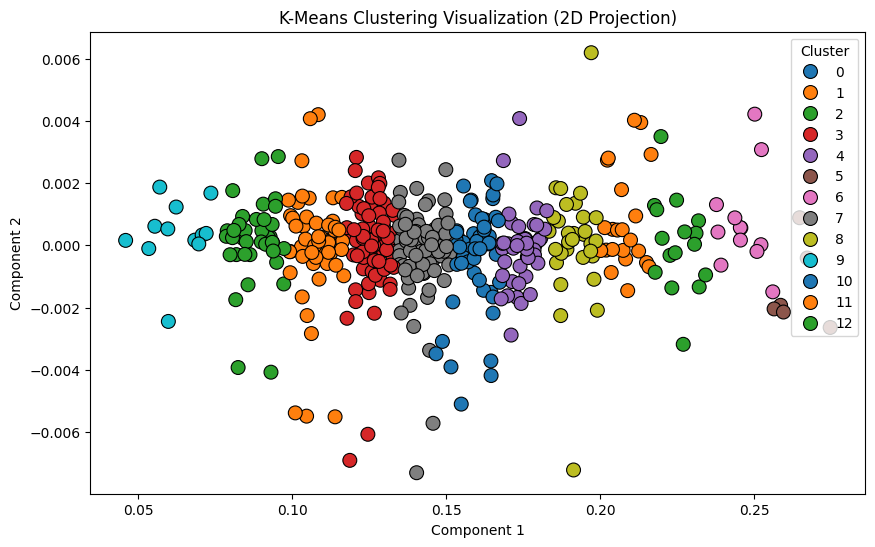

Finished displaying at: 2025-03-09 22:36:20 

Finished executing at: 2025-03-09 22:36:20 

Executed at: 2025-03-09 22:36:20 

[[-8.0364983e-04 -7.0915680e-04 -5.5394080e-03 ... -3.9244783e-03
  -1.7836630e-04  6.8312080e-04]
 [-2.2810583e-04 -6.5836048e-04 -4.7897724e-03 ... -3.4811832e-03
   3.8416308e-04  7.1741635e-04]
 [-6.2071584e-04 -3.2984812e-04 -3.0477871e-03 ... -1.5856758e-03
   4.0257344e-04  2.5396061e-04]
 ...
 [-2.1647813e-04 -1.2980543e-04 -4.6730656e-03 ... -3.8200852e-03
  -3.5315310e-04  6.8081712e-04]
 [-5.8614422e-04 -7.2017504e-04 -4.0640957e-03 ... -3.2378561e-03
  -4.7701705e-04  4.2655683e-04]
 [-6.7969675e-05 -5.1837420e-04 -4.6502897e-03 ... -3.3115032e-03
  -2.9090018e-04  8.0219621e-04]]
dm=0, Vector_Size=3750, Window=3, Epoch=50
Finished at: 2025-03-09 22:36:31 

Executing 13 start time: 2025-03-09 22:36:31
K=13: Silhouette Score and WSS=0.1324	0.1032

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Law ministry notifies appoin

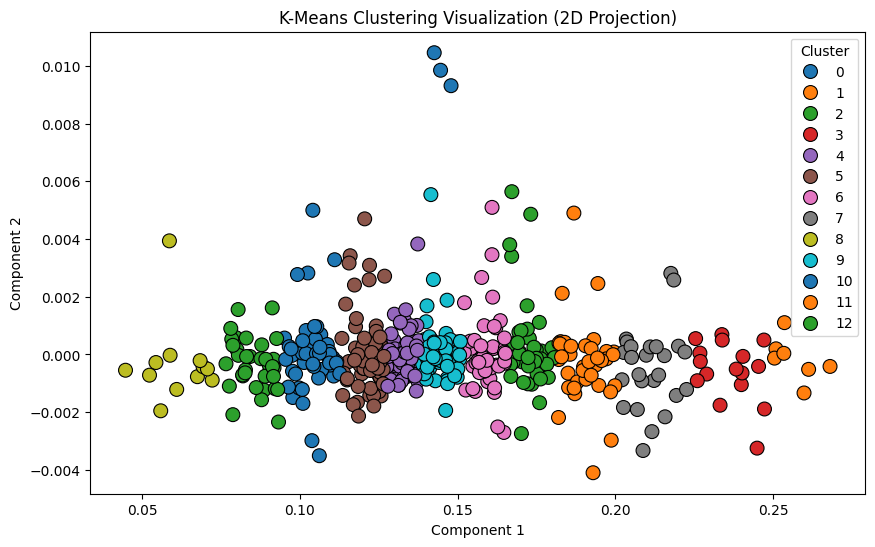

Finished displaying at: 2025-03-09 22:36:32 

Finished executing at: 2025-03-09 22:36:32 

Executed at: 2025-03-09 22:36:32 

[[ 0.00194447 -0.00301037 -0.00351551 ... -0.00500878 -0.00475686
  -0.00077781]
 [ 0.00166784 -0.00286441 -0.00296262 ... -0.00462067 -0.00404048
  -0.00082069]
 [ 0.00144286 -0.00152641 -0.00168494 ... -0.00226245 -0.00263163
  -0.00027052]
 ...
 [ 0.0021366  -0.00255813 -0.00299782 ... -0.00464118 -0.00467152
  -0.00057628]
 [ 0.00207292 -0.0022893  -0.00302576 ... -0.00382669 -0.00415671
  -0.00048823]
 [ 0.00210473 -0.00262621 -0.00261909 ... -0.00405609 -0.00417932
  -0.00101111]]
dm=0, Vector_Size=4000, Window=3, Epoch=50
Finished at: 2025-03-09 22:36:42 

Executing 13 start time: 2025-03-09 22:36:42
K=13: Silhouette Score and WSS=0.1063	0.0926

Cluster 0:
- PM Shehbaz invites Turkish businessmen to invest in Pakistan’s diverse fields
- Sindh govt relaxes timing of ban on entry of heavy vehicles
- Still Angry at Your Ex? The San Antonio Zoo Will Name a Co

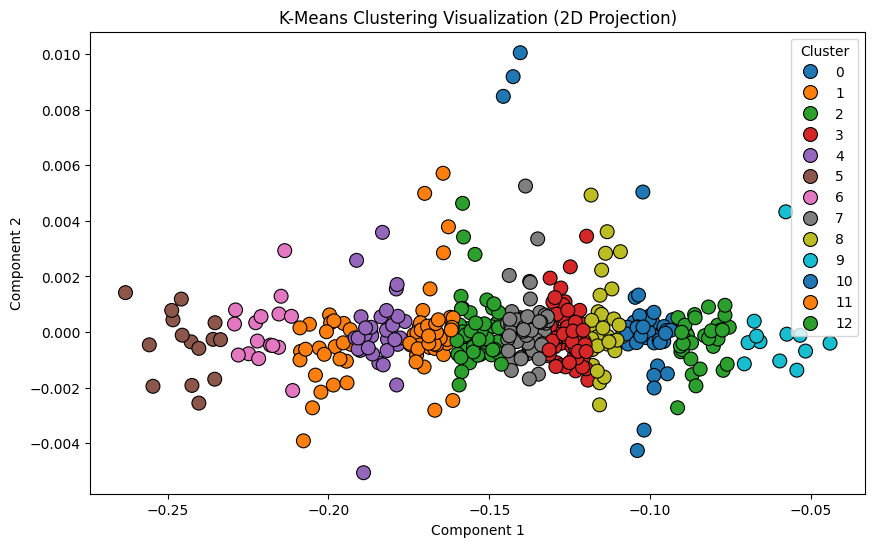

Finished displaying at: 2025-03-09 22:36:44 

Finished executing at: 2025-03-09 22:36:44 



In [684]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [685]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results_2.csv", index=False)

# Open the file automatically
os.startfile("clustering_results_2.csv")

results_df

k Vectorizer Type  vector_size  window  Epochs Count Vectorizer Name  \
0    5         Doc2Vec         2500       3            50            DBOW   
1    5         Doc2Vec         2750       3            50            DBOW   
2    5         Doc2Vec         3000       3            50            DBOW   
3    5         Doc2Vec         3250       3            50            DBOW   
4    5         Doc2Vec         3500       3            50            DBOW   
5    5         Doc2Vec         3750       3            50            DBOW   
6    5         Doc2Vec         4000       3            50            DBOW   
7    9         Doc2Vec         2500       3            50            DBOW   
8    9         Doc2Vec         2750       3            50            DBOW   
9    9         Doc2Vec         3000       3            50            DBOW   
10   9         Doc2Vec         3250       3            50            DBOW   
11   9         Doc2Vec         3500       3            50            DBOW   
12   9         Doc2Vec         3750       3            50            DBOW   
13   9         Doc2Vec         4000       3            50            DBOW   
14  13         Doc2Vec         2500       3            50            DBOW   
15  13         Doc2Vec         2750       3            50            DBOW   
16  13         Doc2Vec         3000       3            50            DBOW   
17  13         Doc2Vec         3250       3            50            DBOW   
18  13         Doc2Vec         3500       3            50            DBOW   
19  13         Doc2Vec         3750       3            50            DBOW   
20  13         Doc2Vec         4000       3            50            DBOW   

    Silhouette Score  WSS Score  
0           0.262166   0.214088  
1           0.274422   0.202670  
2           0.270954   0.183929  
3           0.264666   0.166314  
4           0.268589   0.156764  
5           0.271498   0.147710  
6           0.269505   0.139805  
7           0.162751   0.163394  
8           0.169657   0.152471  
9           0.168003   0.138293  
10          0.161702   0.122499  
11          0.171477   0.117688  
12          0.189898   0.109968  
13          0.153963   0.102017  
14          0.109474   0.149737  
15          0.114829   0.135161  
16          0.123287   0.124381  
17          0.119946   0.112053  
18          0.126569   0.105234  
19          0.132414   0.103214  
20          0.106316   0.092554

In [686]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

k  Average WSS Score
0   5           0.173040
1   9           0.129475
2  13           0.117476

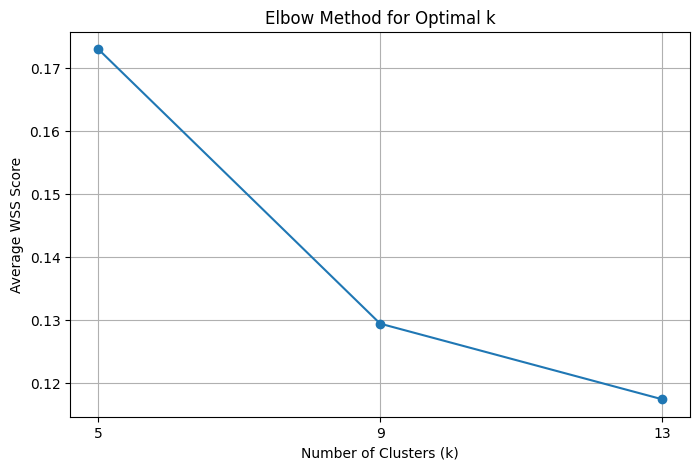

In [687]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [688]:
best_combination # vector size, window size, epoch

[5, 'doc', 'DBOW', 4000, 3, 50, 0.2695049, 0.13980528712272644]